# FASE 1: Entendiendo el negocio

## Contexto:

La empresa **SotoBurguer S.A**., una compañía especializada en el análisis de datos para la industria de los videojuegos, ha sido contratada por Epic Games para ayudar a mejorar la experiencia de juego en Fortnite. El objetivo principal es utilizar los datos de rendimiento de los jugadores en modo solitario para desarrollar un modelo predictivo que pueda identificar a los jugadores con un alto potencial de rendimiento y aquellos que podrían estar en riesgo de abandonar el juego debido a un bajo desempeño.

## Problematica: 

Epic Games ha observado que la retención de jugadores en Fortnite es crucial para el éxito a largo plazo del juego. Sin embargo, algunos jugadores, especialmente aquellos con un bajo desempeño, tienden a abandonar el juego después de experimentar frustración por no lograr buenos resultados. La empresa quiere crear un sistema que pueda predecir el rendimiento futuro de los jugadores basándose en su historial de juegos en modo solitario.

## Objetivo:
Desarrollar un modelo de predicción basado en las estadísticas actuales de un jugador (como el `Solo kd`, `Solo winRatio`, `Solo matches` y otras métricas), pueda predecir:
 1. **El nivel de desempeño futuro** del jugador en términos de victorias y ratio de kills/deaths (KD).
 2. **El riesgo de abandono** del jugador, definido como una disminución significativa en el número de partidas jugadas o un cambio abrupto en su rendimiento.
3. **¿Qué factores influyen en la puntuación (Solo score) de un jugador?**
4. **¿Existe una relación significativa entre el tiempo jugado (Solo minutesPlayed) y el ratio de victorias (Solo winRatio)?**

## En este conjunto de datos hay 5 modos de juego (Solo, Duo, Trios. Squads y ltm) cada uno tiene:
**Puntuación:** Puntuación total.
**top1**: Victorias totales.
**kd:** Ratio de muertes.
**WinRatio:** Ratio de victorias.
**matches:** Número de partidos jugados.
**kills:** Número de eliminaciones realizadas.
**minutesPlayed:** Número total de minutos jugados.


In [ ]:
# Se realiza las importaciones de las Librerias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
#cargar dataset
df_completo = pd.read_csv('Fortnite_players_stats.csv', sep=",")

In [ ]:
print(df_completo.columns)

Index(['Player', 'Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio',
       'Solo matches', 'Solo kills', 'Solo minutesPlayed', 'Duos score',
       'Duos top1', 'Duos kd', 'Duos winRatio', 'Duos matches', 'Duos kills',
       'Duos minutesPlayed', 'Trios score', 'Trios top1', 'Trios kd',
       'Trios winRatio', 'Trios matches', 'Trios kills', 'Trios minutesPlayed',
       'Squads score', 'Squads top1', 'Squads kd', 'Squads winRatio',
       'Squads matches', 'Squads kills', 'Squads minutesPlayed', 'LTM score',
       'LTM top1', 'LTM top3', 'LTM kd', 'LTM winRatio', 'LTM matches',
       'LTM kills', 'LTM minutesPlayed'],
      dtype='object')


In [ ]:
df = df_completo[['Player', 'Solo score', 'Solo top1', 'Solo kd', 
                           'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']]

# FASE 2: Data Understanding


# Verificar columnas y tipos de datos

In [ ]:
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Player ------ Tipo de variable: Cualitativa nominal
Columna Solo score ------ Tipo de variable: Cuantitativa discreta
Columna Solo top1 ------ Tipo de variable: Cuantitativa discreta
Columna Solo kd ------ Tipo de variable: Cuantitativa continua
Columna Solo winRatio ------ Tipo de variable: Cuantitativa continua
Columna Solo matches ------ Tipo de variable: Cuantitativa discreta
Columna Solo kills ------ Tipo de variable: Cuantitativa discreta
Columna Solo minutesPlayed ------ Tipo de variable: Cuantitativa discreta


In [ ]:
# Se filtran las 10 primeras Filas
df.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441


In [ ]:
#Se Filtra el tipo de dato de la columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              1435 non-null   object 
 1   Solo score          1435 non-null   int64  
 2   Solo top1           1435 non-null   int64  
 3   Solo kd             1435 non-null   float64
 4   Solo winRatio       1435 non-null   float64
 5   Solo matches        1435 non-null   int64  
 6   Solo kills          1435 non-null   int64  
 7   Solo minutesPlayed  1435 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 89.8+ KB


Verificación de datos nulos y posibles errores en DataFrame.

In [ ]:
# Verificación de datos nulos en el dataset
df.isnull().sum()

Player                0
Solo score            0
Solo top1             0
Solo kd               0
Solo winRatio         0
Solo matches          0
Solo kills            0
Solo minutesPlayed    0
dtype: int64

De momento los datos a utilizar no arrojan datos nulos, pero existe la posibilidad que hayan datos negativos que los interprete como datos no nulos por lo que se verificara con el siguiente código. 

In [ ]:
# Verificar si hay datos negativos
(df[['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']] < 0).sum()

Solo score            0
Solo top1             0
Solo kd               0
Solo winRatio         0
Solo matches          0
Solo kills            0
Solo minutesPlayed    0
dtype: int64

Al no existir datos negativos y nulos, estamos listo para comenzar las medidas de posición.

### Medidas de posición

In [ ]:
#Resumen de Medidas de posición, para datos numéricos
print(df.describe())

         Solo score    Solo top1      Solo kd  Solo winRatio  Solo matches  \
count  1.435000e+03  1435.000000  1435.000000    1435.000000   1435.000000   
mean   1.088202e+06   328.909408     1.816300       4.853937   6911.060627   
std    8.872639e+05   529.192568     1.156026       5.330249   5408.219523   
min    4.453000e+03     0.000000     0.080000       0.000000     30.000000   
25%    4.355170e+05    65.500000     1.050000       1.600000   2875.000000   
50%    9.070010e+05   162.000000     1.480000       2.900000   5728.000000   
75%    1.506555e+06   366.000000     2.200000       6.100000   9585.000000   
max    6.772116e+06  6480.000000     9.600000      44.100000  36487.000000   

         Solo kills  Solo minutesPlayed  
count   1435.000000         1435.000000  
mean   11781.843206        43517.135889  
std    11417.340071        36314.877771  
min       28.000000          210.000000  
25%     3861.000000        16922.000000  
50%     8452.000000        35762.000000  
75%

In [ ]:
# Excluir columnas no numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                    Solo score  Solo top1   Solo kd  Solo winRatio  \
Solo score            1.000000   0.598385  0.203172       0.245719   
Solo top1             0.598385   1.000000  0.659677       0.768525   
Solo kd               0.203172   0.659677  1.000000       0.854501   
Solo winRatio         0.245719   0.768525  0.854501       1.000000   
Solo matches          0.860244   0.361533  0.036813      -0.022918   
Solo kills            0.715041   0.748277  0.613477       0.448650   
Solo minutesPlayed    0.979049   0.484908  0.067514       0.133830   

                    Solo matches  Solo kills  Solo minutesPlayed  
Solo score              0.860244    0.715041            0.979049  
Solo top1               0.361533    0.748277            0.484908  
Solo kd                 0.036813    0.613477            0.067514  
Solo winRatio          -0.022918    0.448650            0.133830  
Solo matches            1.000000    0.705988            0.859965  
Solo kills              0.705988    1

##  Matriz de correlación

Las variables Solo score, Solo matches y Solo minutesPlayed están fuertemente correlacionadas, podemos decir que el tiempo jugado y el número de partidas tienen un gran impacto en la puntuación total.

Solo winRatio está fuertemente correlacionado con la capacidad del jugador de estar en el Solo top1 y con su habilidad de combate (Solo kd).

No hay correlación significativa entre algunas variables, como Solo matches y Solo kd, lo que puede sugerir que jugar más partidas no mejora la relación de asesinatos/muertes de un jugador.

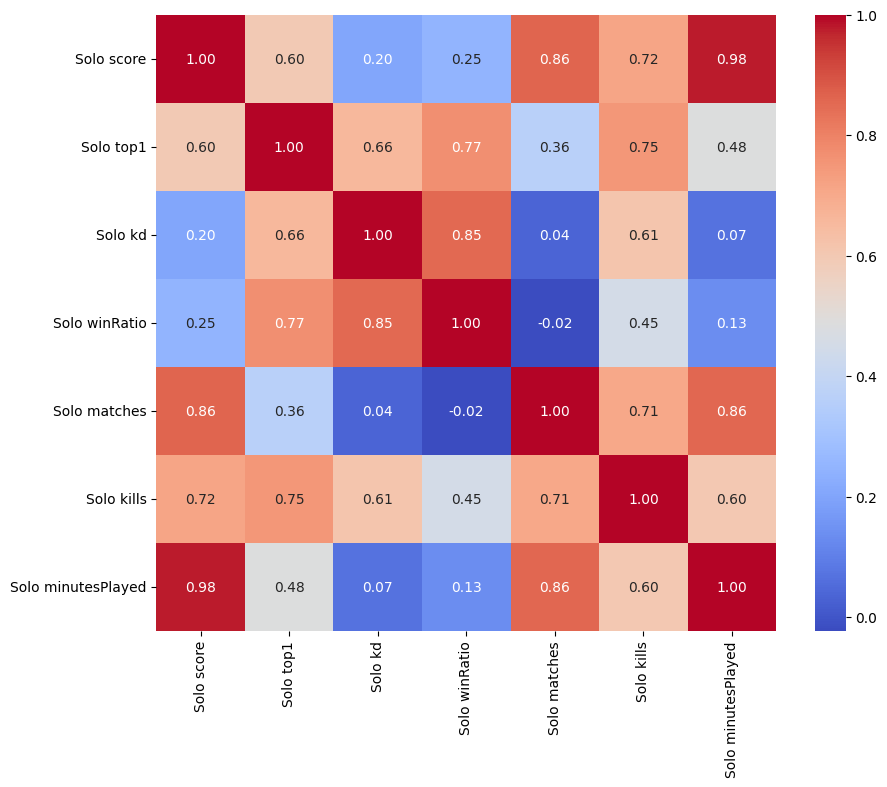

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Scatter Plots (Diagramas de Dispersión):

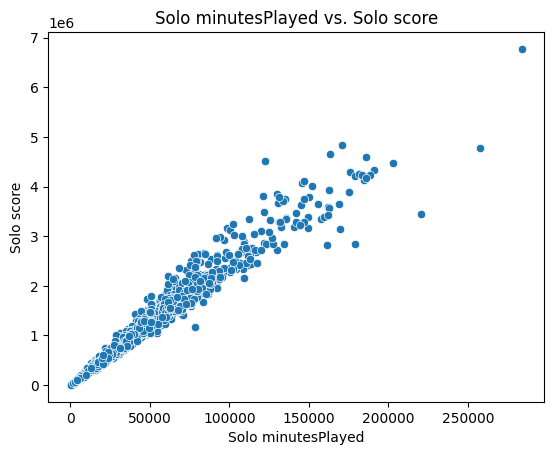

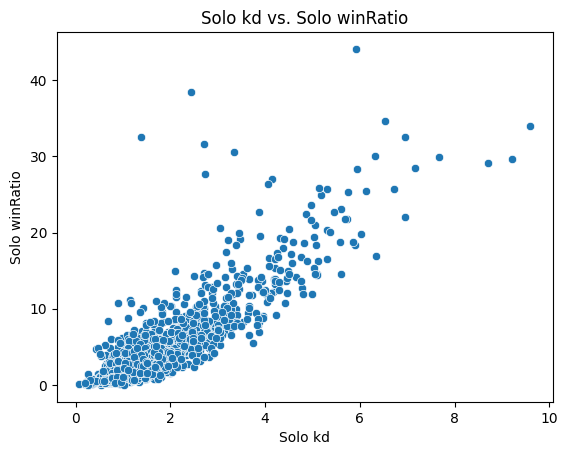

In [ ]:
sb.scatterplot(x='Solo minutesPlayed', y='Solo score', data=df)
plt.title('Solo minutesPlayed vs. Solo score')
plt.show()

sb.scatterplot(x='Solo kd', y='Solo winRatio', data=df)
plt.title('Solo kd vs. Solo winRatio')
plt.show()



Solo minutesPlayed vs. Solo score: Dado que existe una fuerte correlación entre el tiempo jugado y el puntaje, un scatter plot puede mostrar cómo el puntaje de los jugadores aumenta con el tiempo jugado.
Solo kd vs. Solo winRatio: Con una correlación alta entre el ratio KD y el winRatio, un scatter plot puede ayudar a visualizar cómo se relacionan estas dos métricas.

# Box Plot

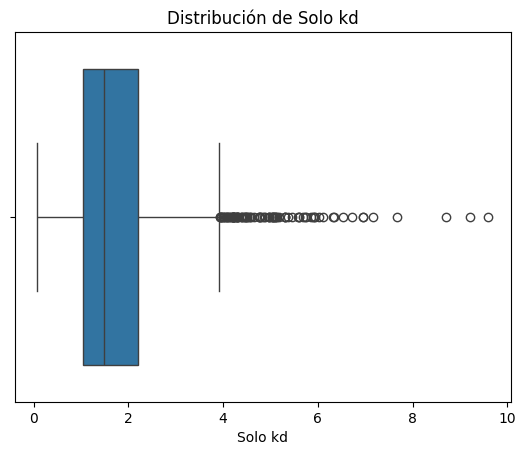

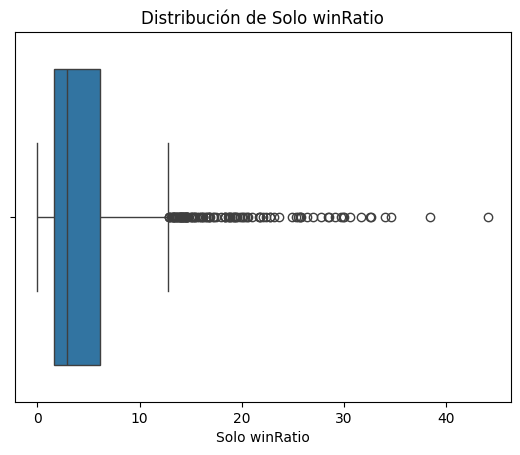

In [ ]:
sb.boxplot(x='Solo kd', data=df)
plt.title('Distribución de Solo kd')
plt.show()

sb.boxplot(x='Solo winRatio', data=df)
plt.title('Distribución de Solo winRatio')
plt.show()


Solo KD: La línea dentro de la caja representa la mediana del Solo kd, que parece estar alrededor de 1. Esto significa que el 50% de los jugadores tienen un ratio de eliminación-muerte menor o igual a 1.

Se observa un grupo considerable de outliers a la derecha del gráfico, es decir, jugadores que tienen un Solo kd significativamente mayor que el promedio. Algunos jugadores tienen valores de Solo kd que llegan hasta 10, pero son casos poco comunes.

Solo winRatio: La línea en la caja sugiere que la mediana del win ratio está entre 5% y 10%, lo que indica que el 50% de los jugadores ganan menos del 10% de las partidas que juegan.

Nuevamente, se observan muchos outliers hacia la derecha, con algunos jugadores logrando ratios de victoria que superan el 40%. Estos jugadores son excepcionales en comparación con la mayoría.

# Histogramas

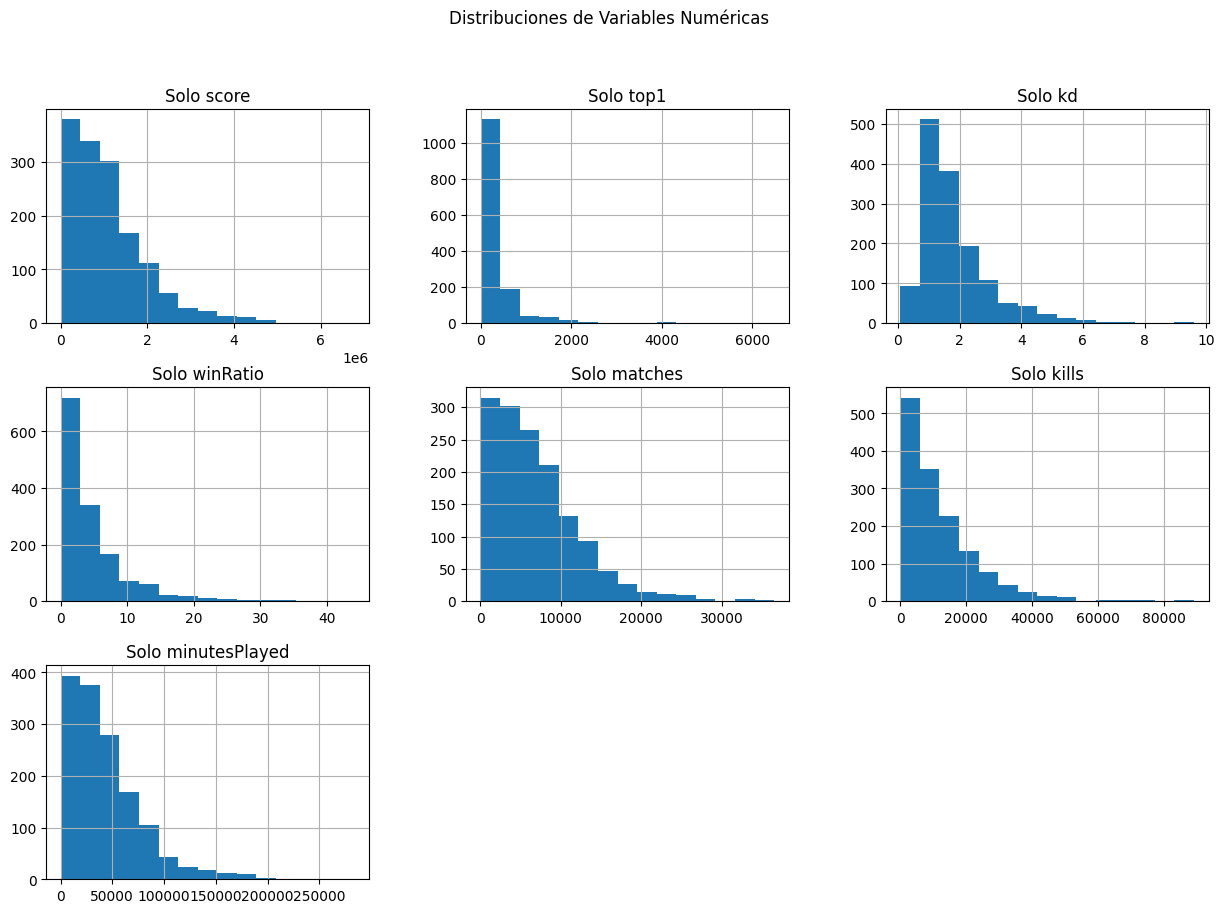

In [ ]:
df_numeric.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.show()


Solo score:
-Hay una concentración de valores bajos y una larga cola hacia la derecha, lo que nos indicaría que la mayoría de los jugadores tienen una puntuación baja, mientras que muy pocos tienen puntuaciones extremadamente altas.
Solo top1:
-La mayoría de los jugadores tienen pocas o ninguna victoria, mientras que solo unos pocos tienen un gran número de victorias.                            
Solo kd:
-La mayoría de los jugadores tienen un kd bajo, con pocos jugadores teniendo un kd muy alto.
-Tiene una distribución sesgada a la derecha, indicando que la mayoría de los jugadores no tienen una relación de asesinatos/muertes alta.
Solo winRatio:
-La mayoría de los jugadores tienen una proporción de victorias baja (menor a 10%), con solo unos pocos jugadores alcanzando porcentajes mayores.
Solo matches:
-Se tiene una distribución sesgada a la derecha, nos indica que es común tener pocos jugadores que juegan muchas partidas y que la mayoría han jugado un número relativamente bajo de partidas, mientras que unos pocos han jugado muchas más.
Solo kills:
-La mayoría de los jugadores tienen un número bajo de asesinatos, y pocos jugadores tienen un número muy alto.
-Esta variable también muestra una distribución sesgada a la derecha.
Solo minutesPlayed:
-La mayoría de los jugadores tienen menos tiempo de juego, y hay algunos jugadores con una cantidad de tiempo de juego muy alta.

## Identificar los jugadores con el mejor rendimiento en Modo Solitario

In [ ]:
# Ordenar por rendimiento en el modo Solo
mejores_jugadores_solo = df.sort_values(by=['Solo score', 'Solo winRatio', 'Solo kd'], ascending=False)

# Mostrar los jugadores con el mejor rendimiento en cada modo
print("Mejores jugadores en Solo:\n", mejores_jugadores_solo[['Player', 'Solo score', 'Solo winRatio', 'Solo kd']].head(10))


Mejores jugadores en Solo:
                Player  Solo score  Solo winRatio  Solo kd
8               ᴮᵒˢˢン     6772116           32.6     1.39
11     DarkAssaSSin._     4840719           30.6     3.34
110         TEBELKING     4784847            5.5     0.95
14            MachiTv     4659548           19.5     3.90
53          Ninjadad5     4595164            0.8     1.01
2              Raпger     4519465           34.0     9.60
144          RailCart     4479084            1.8     0.73
37               Ci2i     4323464            1.6     0.84
17          prOMancos     4300077            1.8     1.27
186  facu giorgetta29     4253032            7.0     1.36


## Cálculo de los jugadores de menor rendimiento, riesgo de abandono en el Modo Solitario y disminución significativa en el número de partidas jugadas

In [ ]:
# Filtrar jugadores con Solo kd y Solo winRatio bajos (por debajo de la mediana)
jugadorBajoRendimiento = df[(df['Solo kd'] < df['Solo kd'].median()) & 
                             (df['Solo winRatio'] < df['Solo winRatio'].median())]
# Guardar el dataset filtrado como archivo CSV
jugadorBajoRendimiento.to_csv('jugadoresBajoRendimiento.csv', index=False)

In [ ]:
# Filtrar jugadores que han jugado pocas partidas en comparación con el promedio
jugadoresPocasPartidas = df[df['Solo matches'] < df['Solo matches'].quantile(0.25)]
# Guardar el dataset
jugadoresPocasPartidas.to_csv('jugadoresPocasPartidas.csv', index=False)

In [ ]:
# Filtrar jugadores con bajo rendimiento y baja actividad
jugadorBajoRendimientoyBajaAct = df[(df['Solo kd'] < df['Solo kd'].median()) & 
                     (df['Solo winRatio'] < df['Solo winRatio'].median()) & 
                     (df['Solo matches'] < df['Solo matches'].quantile(0.25))]
# Guardar el dataset
jugadorBajoRendimientoyBajaAct.to_csv('jugadorBajoRendimientoyBajaAct.csv', index=False)

In [ ]:
jugadorBajoRendimiento.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441
13,Τriρs,478280,25,0.70,1.0,2581,1785,21679
17,prOMancos,4300077,576,1.27,1.8,32898,40942,175643
18,Scribell,212388,34,1.03,2.3,1491,1505,8945
19,Qx_9u انستا,228620,79,1.03,2.4,3269,3281,8903
23,Deathfury420,1257973,51,0.95,0.6,8568,8101,55671
24,KING nax nax,1407541,70,0.80,0.7,10460,8356,63105
28,UçaN_HamSi,67758,25,0.68,1.1,2182,1471,3199
29,Kid_Fighter,2428145,331,1.06,2.8,11967,12348,103551


In [ ]:
print(jugadorBajoRendimiento.describe())

         Solo score   Solo top1     Solo kd  Solo winRatio  Solo matches  \
count  5.730000e+02  573.000000  573.000000     573.000000    573.000000   
mean   9.795136e+05   99.668412    1.001850       1.451134   7292.431065   
std    9.044167e+05   92.986643    0.277303       0.693415   6444.610264   
min    4.453000e+03    0.000000    0.080000       0.000000     30.000000   
25%    2.862850e+05   28.000000    0.830000       0.900000   2256.000000   
50%    7.330330e+05   74.000000    1.020000       1.400000   5752.000000   
75%    1.359115e+06  143.000000    1.230000       2.000000  10247.000000   
max    4.595164e+06  591.000000    1.470000       2.800000  36487.000000   

         Solo kills  Solo minutesPlayed  
count    573.000000          573.000000  
mean    7384.303665        42627.394415  
std     6923.464940        40263.510377  
min       28.000000          210.000000  
25%     2147.000000        12418.000000  
50%     5460.000000        31656.000000  
75%    10606.000000  

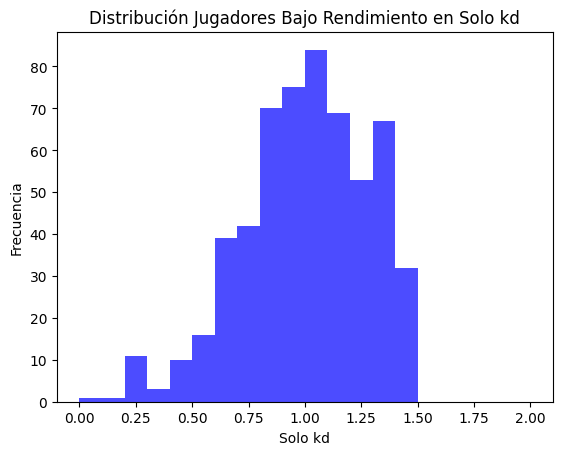

In [ ]:
# Histograma de Solo kd para jugadores de bajo rendimiento
plt.hist(jugadorBajoRendimiento['Solo kd'], bins=20, color='blue', alpha=0.7, range=(0,2))
plt.title('Distribución Jugadores Bajo Rendimiento en Solo kd')
plt.xlabel('Solo kd')
plt.ylabel('Frecuencia')
plt.show()

La mayor concentración de jugadores de menor rendimiento está alrededor de los valores de 1.0 y 1.25 en Solo kd. Esto significa que la mayoría de los jugadores considerados de bajo rendimiento tienen una proporción de 1 o un poco más de 1 muerte por cada vez que mueren.

Casi no hay jugadores con un Solo kd superior a 1.5, lo que refuerza la idea de que estos jugadores están en la categoría de bajo rendimiento y con altas posibilidades de abandono de juego.

## ¿Qué factores influyen en la puntuación (Solo score) de un jugador?

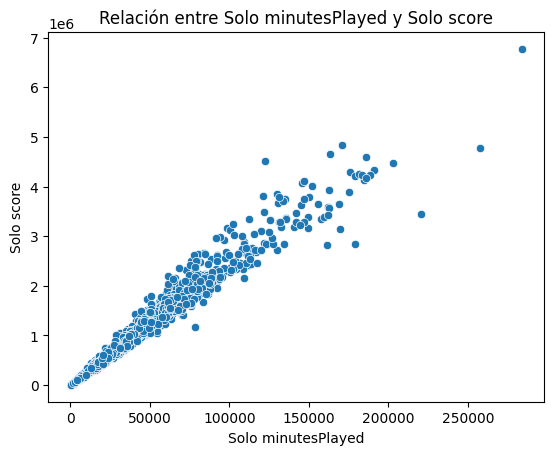

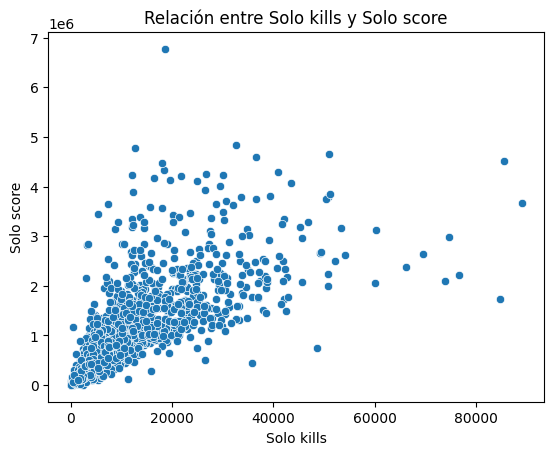

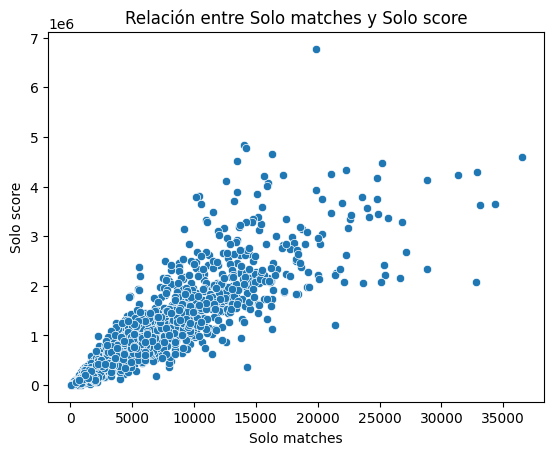

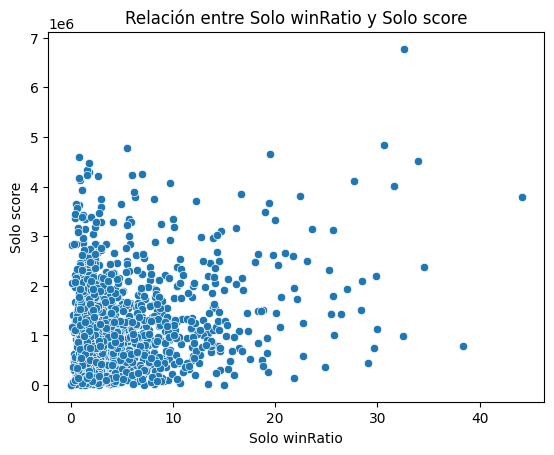

In [ ]:
variables = ['Solo minutesPlayed', 'Solo kills', 'Solo matches', 'Solo winRatio']

# Gráficos de dispersión
for var in variables:
    plt.figure()
    sb.scatterplot(x=df[var], y=df['Solo score'])
    plt.title(f'Relación entre {var} y Solo score')
    plt.xlabel(var)
    plt.ylabel('Solo score')
    plt.show()

Existe una fuerte correlación entre el tiempo jugado (Solo minutesPlayed), el número de partidas (Solo matches), y el puntaje (Solo score). Esto indica que el puntaje es influenciado significativamente por la cantidad de tiempo y partidas jugadas. Aunque Solo kills también muestra una correlación positiva con el Solo Score, la dispersión muestra que la presencia de otros factores influyentes. Solo winRatio muestra la menor correlación, lo que indica que ganar una mayor proporción de partidas no siempre asegura un puntaje más alto.

## Existe una relación significativa entre el tiempo jugado (Solo minutesPlayed) y el ratio de victorias (Solo winRatio)?

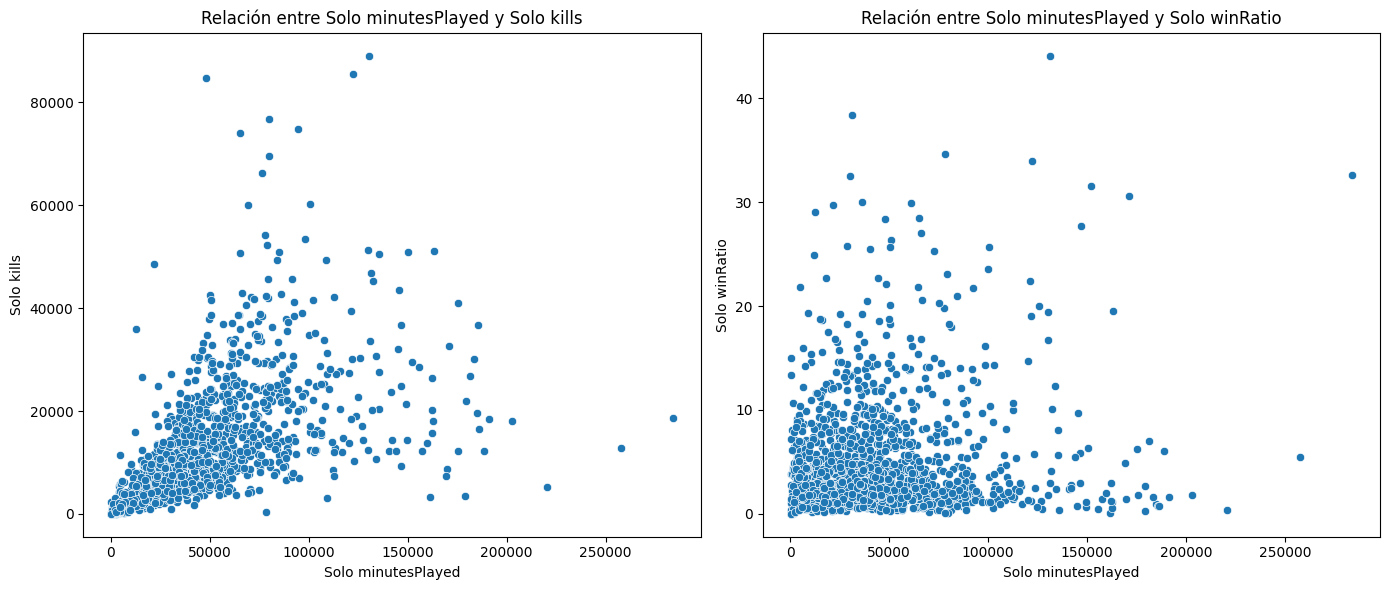

In [ ]:
# Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Scatter plot entre Solo minutesPlayed y Solo kills
plt.subplot(1, 2, 1)
sb.scatterplot(x=df['Solo minutesPlayed'], y=df['Solo kills'])
plt.title('Relación entre Solo minutesPlayed y Solo kills')
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo kills')

# Scatter plot entre Solo minutesPlayed y Solo winRatio
plt.subplot(1, 2, 2)
sb.scatterplot(x=df['Solo minutesPlayed'], y=df['Solo winRatio'])
plt.title('Relación entre Solo minutesPlayed y Solo winRatio')
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo winRatio')

plt.tight_layout()
plt.show()

En el primer gráfico se observa que hay una tendencia positiva entre SoloMinutesPlayed y Solo Kills, según la matriz de correlación es de un 0.60, lo que indica que a medida que el tiempo de juego aumenta, también aumenta el número de eliminaciones. 

Podemos decir que los jugadores que juegan más tiempo tienden a conseguir más eliminaciones. Pero, la separación de puntos nos demuestra que son muy dispersas, lo que nos señala que no todos los jugadores con mucho tiempo de juego tienen un alto número de eliminaciones.

En el gráfico de Relación entre SoloMinutesPlayed y SoloWinRatio no hay una relación clara entre estas dos variables, ya que los puntos están distribuidos de manera más dispersa y no existe una tendencia clara.

# Fase 3 Data Preparation

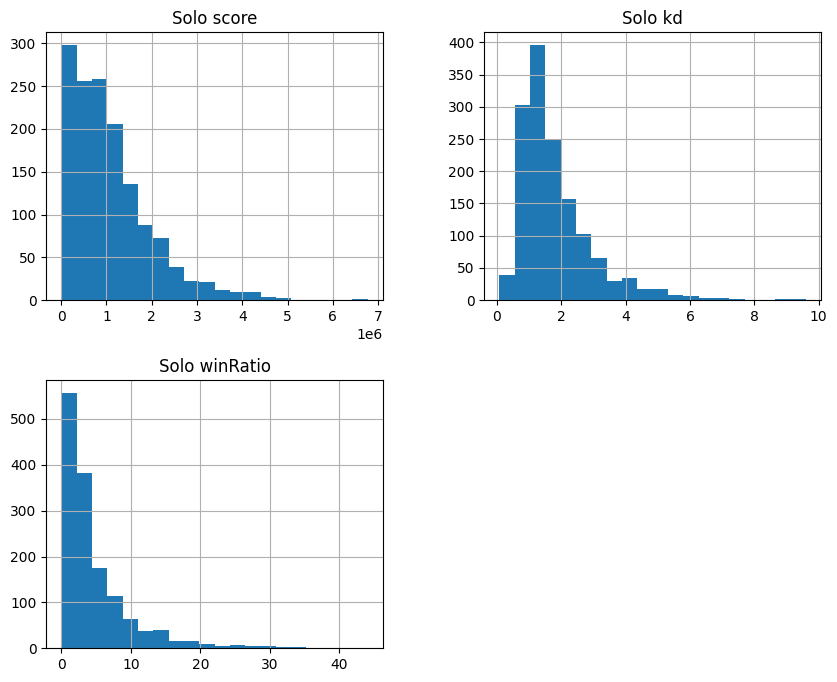

In [ ]:
# Histograma para visualizar la distribución
df[['Solo score', 'Solo kd', 'Solo winRatio']].hist(bins=20, figsize=(10, 8))
plt.show()

Solo score (Puntuación en Solitario):  Este tipo de distribución sugiere que la mayor parte de los jugadores están concentrados en un rango bajo de puntuación, con un número reducido de jugadores que logran puntuaciones muy altas. Esto puede indicar una disparidad en el rendimiento, donde solo unos pocos jugadores son significativamente más exitosos que el promedio.

 Solo kd (Relación K/D en Solitario): Esto indica que muchos jugadores tienden a mantener un rendimiento equilibrado (un número similar de bajas y muertes), mientras que solo algunos jugadores tienen un rendimiento mucho más alto (con un kd por encima de 2 o 3). Los valores extremos pueden ser jugadores con mucha habilidad o que se enfrentan a oponentes de menor nivel.

Solo winRatio (Porcentaje de Victorias en Solitario): La mayoría de los jugadores probablemente tengan dificultades para ganar en partidas en solitario. Solo un pequeño porcentaje logra un winRatio alto, lo cual es esperable, ya que las victorias son un resultado más exclusivo en un entorno competitivo como Fortnite.

Todas las variables muestran una distribución sesgada a la derecha, lo que sugiere que la mayoría de los jugadores tienen un rendimiento moderado, mientras que solo unos pocos logran resultados significativamente mejores.

Para mejorar el rendimiento del modelo vamos a normalizar los datos  así obtener un mejor nivel predictivo de los datos.

### Normalización de los datos

Primero seleccionamos las columnas que vamos a normalizar y utilizamos MinMaxScaler para escalar a valores entre 0 y 1.

In [ ]:
columnasNormalizar = ['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']

Columnas antes de la normalización

In [ ]:
df.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441


Columnas después de la normalización

In [ ]:
# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
dfNormalizado = df.copy()  # Crear una copia del DataFrame
dfNormalizado[columnasNormalizar] = scaler.fit_transform(df[columnasNormalizar])
dfNormalizado.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,0.365312,0.282099,0.450630,0.408163,0.277587,0.407888,0.286219
1,BH nixxxay,0.064292,0.261420,0.906513,0.659864,0.158735,0.403023,0.044150
2,Raпger,0.667145,0.707099,1.000000,0.770975,0.369147,0.960200,0.430008
3,Idk_Pi,0.110587,0.018673,0.079832,0.074830,0.100310,0.033451,0.113682
4,Twitch.GryphonRB,0.167241,0.204784,0.655462,0.680272,0.120663,0.219821,0.127052
5,Twitch Kayotica,0.430663,0.202160,0.330882,0.219955,0.367776,0.439384,0.340474
6,FaZe Replays,0.352424,0.224383,0.394958,0.176871,0.511287,0.743109,0.268129
7,NiteGamerYT 190k,0.001687,0.000926,0.040966,0.031746,0.010944,0.001933,0.001865
8,ᴮᵒˢˢン,1.000000,1.000000,0.137605,0.739229,0.544038,0.208798,1.000000
9,CIUPEA 144.HZ,0.007392,0.001389,0.055672,0.011338,0.052336,0.012877,0.007866


aValor cercano a 0: El jugador tiene un bajo rendimiento en comparación con otros jugadores para esa métrica específica.
Valor cercano a 1: El jugador tiene un alto rendimiento en comparación con otros jugadores para esa métrica específica.

"Boss" es el mejor jugador en términos de Solo score, Solo top1, Solo kd y  Solo minutesPlayed, porque sus valores están en 1, lo que indica que está al tope de las métricas de rendimiento en comparación con los demás jugadores.

La normalización nos ayuda a estandarizar las escalas de las diferentes variables para que los algoritmos de machine learning puedan interpretar correctamente los datos, evitando que variables con mayor rango afecten de manera desproporcionada los resultados.

# Tratamiento de outliers

In [ ]:
# Calcular el IQR
Q1 = df['Solo kd'].quantile(0.25)
Q3 = df['Solo kd'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Definir los límites inferior y superior
lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

In [ ]:
# Filtrar datos dentro de los límites
df_solo_sin_outliers = df[(df['Solo kd'] >= lim_inferior) & (df['Solo kd'] <= lim_superior)]

In [ ]:
print("Número de filas antes de eliminar outliers:", len(df))
print("Número de filas después de eliminar outliers:", len(df_solo_sin_outliers))

Número de filas antes de eliminar outliers: 1435
Número de filas después de eliminar outliers: 1343


In [ ]:
# Verificar límites del IQR
print(f"Límite inferior: {lim_inferior}, Límite superior: {lim_superior}")

Límite inferior: -0.675, Límite superior: 3.9250000000000003


In [ ]:
# Cálculo del IQR para Solo minutesPlayed
Q1_mp = df['Solo minutesPlayed'].quantile(0.25)
Q3_mp = df['Solo minutesPlayed'].quantile(0.75)
IQR_mp = Q3_mp - Q1_mp

In [ ]:
# Límite inferior y superior para Solo minutesPlayed
lim_inferior_mp = Q1_mp - 1.5 * IQR_mp
lim_superior_mp = Q3_mp + 1.5 * IQR_mp

In [ ]:
# Filtrar datos sin outliers en Solo kd y Solo minutesPlayed
df_solo_sin_outliers = df_solo_sin_outliers[(df_solo_sin_outliers['Solo minutesPlayed'] >= lim_inferior_mp) & 
                                            (df_solo_sin_outliers['Solo minutesPlayed'] <= lim_superior_mp)]


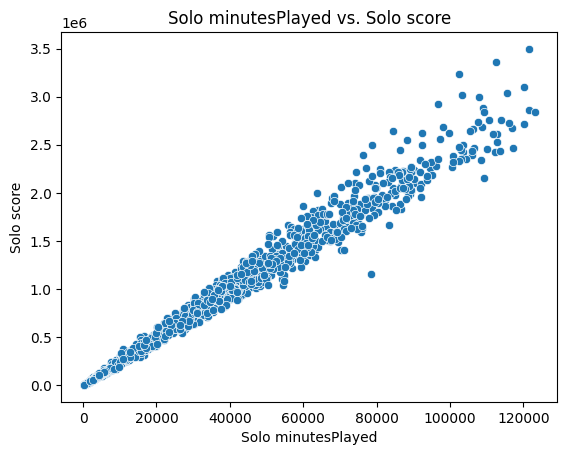

In [ ]:
# Visualización final del scatterplot sin outliers
sb.scatterplot(x='Solo minutesPlayed', y='Solo score', data=df_solo_sin_outliers)
plt.title('Solo minutesPlayed vs. Solo score')
plt.show()

El gráfico resultante muestra una relación positiva entre el tiempo jugado en modo solo (Solo minutesPlayed) y la puntuación obtenida en ese modo (Solo score). Es decir, a medida que los jugadores pasan más tiempo jugando, tienden a obtener puntuaciones más altas.

Esta relación es consistente y sigue una tendencia lineal, aunque se observan algunas dispersiones (pequeñas variaciones) a medida que aumenta el número de minutos jugados.
Al haber filtrado los outliers, se han eliminado valores atípicos que podrían haber distorsionado la interpretación de la tendencia general. El gráfico se concentra en los datos que representan el comportamiento típico de los jugadores.

## Tratamiento de outliers para conocer la existencia de relación significativa entre el tiempo jugado (Solo minutesPlayed) y el ratio de victorias (Solo winRatio)?

In [ ]:
# Cálculo del IQR para Solo minutesPlayed
Q1_minutes = df['Solo minutesPlayed'].quantile(0.25)
Q3_minutes = df['Solo minutesPlayed'].quantile(0.75)
IQR_minutes = Q3_minutes - Q1_minutes

# Cálculo del IQR para Solo kills
Q1_kills = df['Solo kills'].quantile(0.25)
Q3_kills = df['Solo kills'].quantile(0.75)
IQR_kills = Q3_kills - Q1_kills

# Definir límites para Solo minutesPlayed
lower_bound_minutes = Q1_minutes - 1.5 * IQR_minutes
upper_bound_minutes = Q3_minutes + 1.5 * IQR_minutes

# Definir límites para Solo kills
lower_bound_kills = Q1_kills - 1.5 * IQR_kills
upper_bound_kills = Q3_kills + 1.5 * IQR_kills

# Filtrar datos para eliminar outliers
df_sin_outliers = df[(df['Solo minutesPlayed'] >= lower_bound_minutes) & (df['Solo minutesPlayed'] <= upper_bound_minutes) &
                     (df['Solo kills'] >= lower_bound_kills) & (df['Solo kills'] <= upper_bound_kills)]

# Mostrar los datos sin outliers
print(df_sin_outliers)


                Player  Solo score  Solo top1  Solo kd  Solo winRatio  \
3               Idk_Pi      752869        121     0.84            3.3   
4     Twitch.GryphonRB     1136282       1327     6.32           30.0   
7     NiteGamerYT 190k       15872          6     0.47            1.4   
9        CIUPEA 144.HZ       54479          9     0.61            0.5   
10             曼巴精神のR6      208411        103     4.17           12.2   
...                ...         ...        ...      ...            ...   
1430          im bloom      106294         26     2.03            3.5   
1431     Twitch kaOzs_      803918        396     3.42           13.2   
1432           slxyher      603939        310     1.69            5.1   
1433         RD-Antony      747295         71     1.10            1.9   
1434       O-HO-HO-HOǃ     1378689        161     1.68            2.3   

      Solo matches  Solo kills  Solo minutesPlayed  
3             3687        3005               32453  
4             442

Usamos RobustScaler de scikit-learn, para reducir impacto de los outliers escalando los datos de acuerdo al IQR

In [ ]:
scaler = RobustScaler()
df[['Solo minutesPlayed', 'Solo kills']] = scaler.fit_transform(df[['Solo minutesPlayed', 'Solo kills']])

/tmp/ipykernel_65/3731571679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Solo minutesPlayed', 'Solo kills']] = scaler.fit_transform(df[['Solo minutesPlayed', 'Solo kills']])


Text(0, 0.5, 'Solo kills')

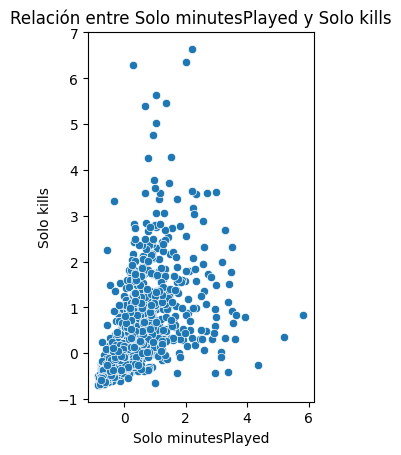

In [ ]:
# Visualizar outliers 
plt.subplot(1, 2, 1)
sb.scatterplot(x=df['Solo minutesPlayed'], y=df['Solo kills'])
plt.title('Relación entre Solo minutesPlayed y Solo kills')
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo kills')


## Tratamiento de outliers para conocer qué factores influyen en la puntuación (Solo score) de un jugador

In [ ]:
Q1 = df['Solo score'].quantile(0.25)
Q3 = df['Solo score'].quantile(0.75)
IQR = Q3 - Q1

# Filtra los datos que no son outliers
dfSinOutliers = df[~((df['Solo score'] < (Q1 - 1.5 * IQR)) | (df['Solo score'] > (Q3 + 1.5 * IQR)))]

# Mostrar los datos sin outliers
print(dfSinOutliers)


                Player  Solo score  Solo top1  Solo kd  Solo winRatio  \
0           Prospеring     2476763       1828     4.37           18.0   
1           BH nixxxay      439562       1694     8.71           29.1   
3               Idk_Pi      752869        121     0.84            3.3   
4     Twitch.GryphonRB     1136282       1327     6.32           30.0   
5      Twitch Kayotica     2919037       1310     3.23            9.7   
...                ...         ...        ...      ...            ...   
1430          im bloom      106294         26     2.03            3.5   
1431     Twitch kaOzs_      803918        396     3.42           13.2   
1432           slxyher      603939        310     1.69            5.1   
1433         RD-Antony      747295         71     1.10            1.9   
1434       O-HO-HO-HOǃ     1378689        161     1.68            2.3   

      Solo matches  Solo kills  Solo minutesPlayed  
0            10150    2.297725            1.072340  
1             581

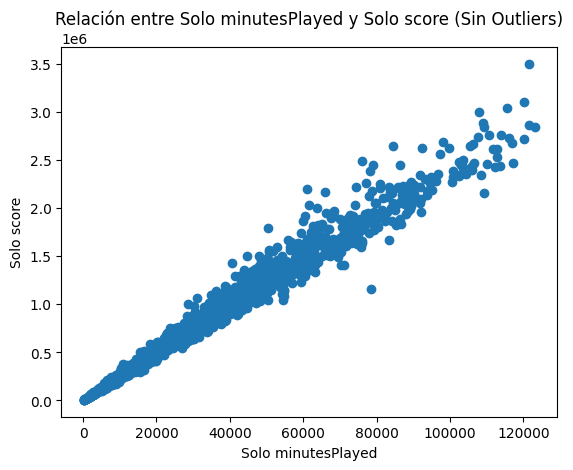

In [ ]:
plt.scatter(df_sin_outliers['Solo minutesPlayed'], df_sin_outliers['Solo score'])
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo score')
plt.title('Relación entre Solo minutesPlayed y Solo score (Sin Outliers)')
plt.show()

Sin los outliers, podemos observar una tendencia lineal clara y más concentrada entre los minutos jugados en solitario (SoloMinutesPlayed) ) y la puntuación (SoloScore) obtenida. A medida que el número de minutos jugados en solitario aumenta, también lo hace la puntuación en solitario.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99ffd8e9-2009-4fc4-a5e5-0dd7b64a5eaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>